# Instalasi Dependensi

In [ ]:
import pandas as pd

# Data Understanding

## Dataset Titanic

In [ ]:
!gdown 1WFT7cZZPskeOC6JTqGq3x7ssf98HZiWM

Downloading...
From: https://drive.google.com/uc?id=1WFT7cZZPskeOC6JTqGq3x7ssf98HZiWM
To: /content/titanic.csv
100% 90.6k/90.6k [00:00<00:00, 71.4MB/s]


In [ ]:
dataset = pd.read_csv('titanic.csv')

In [ ]:
def display_df(df):
      display(df.head())
      print(df.shape)

In [ ]:
display_df(dataset)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


(1309, 12)


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479,0.377387
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668,0.484918
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


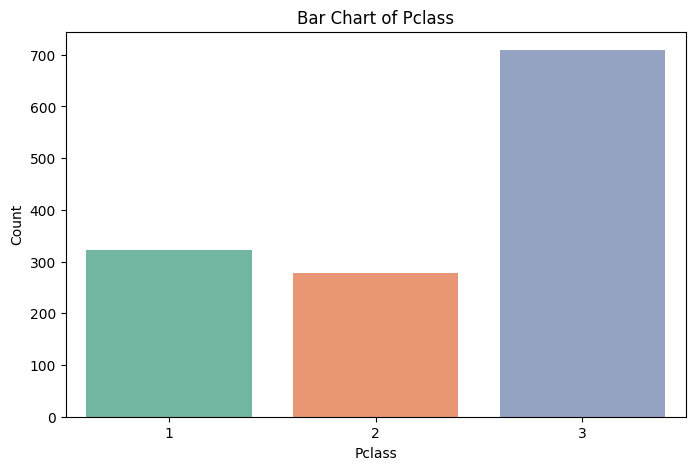

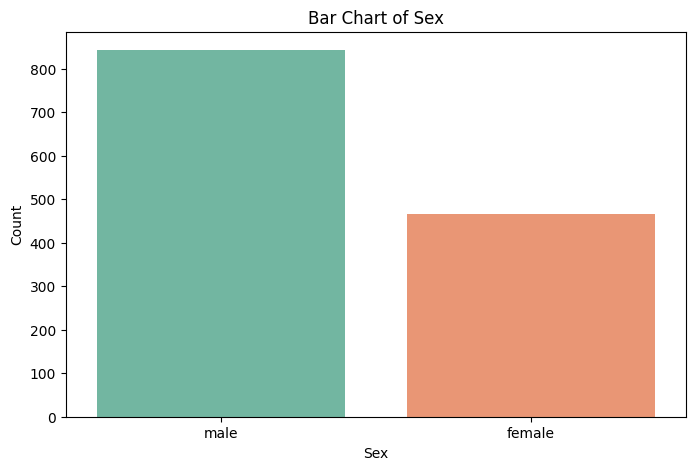

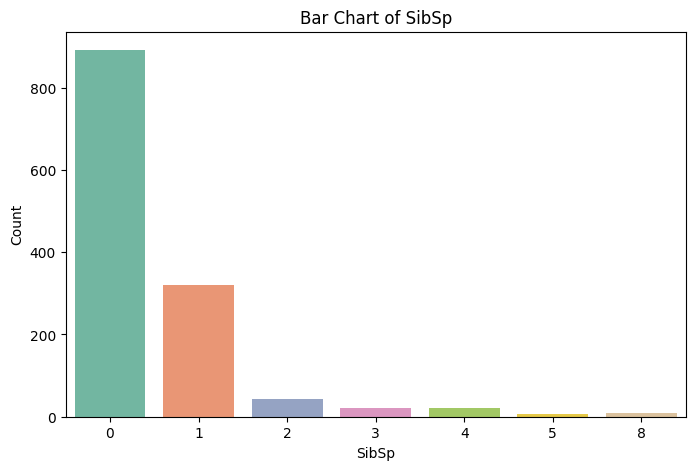

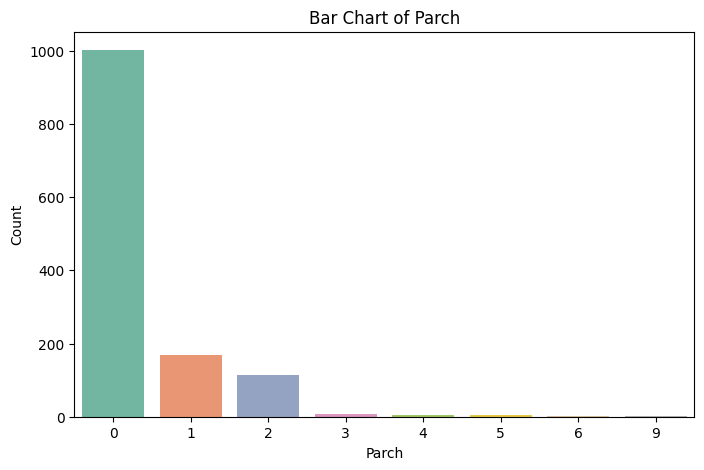

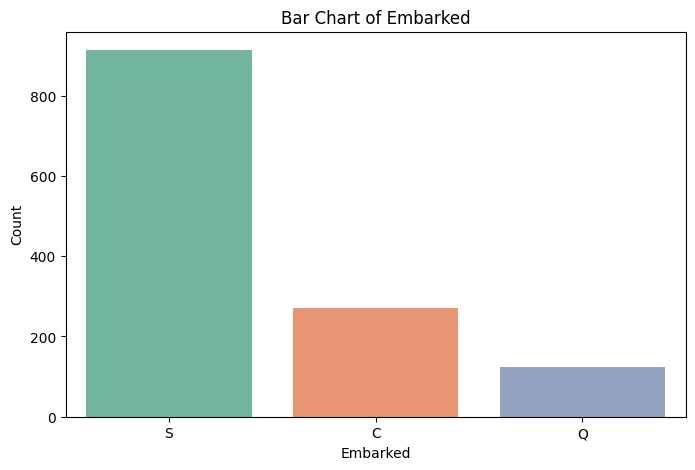

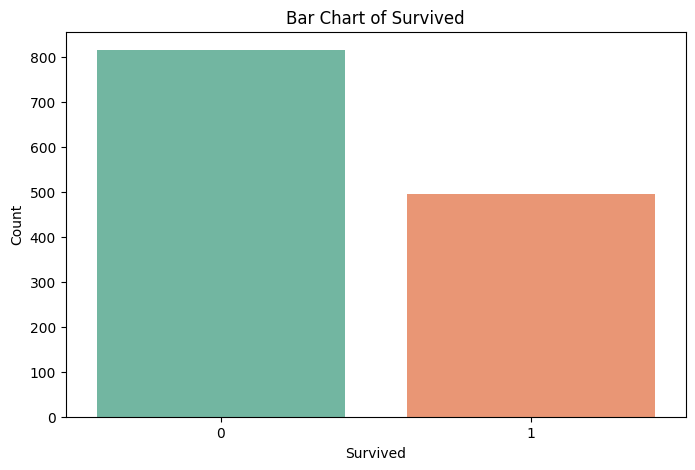

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['Pclass','Sex','SibSp','Parch', 'Embarked', 'Survived']

for column in selected_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=dataset, x=column, palette='Set2')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

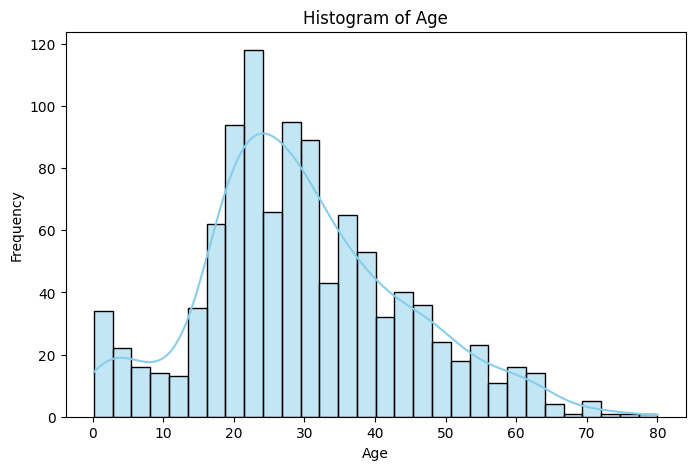

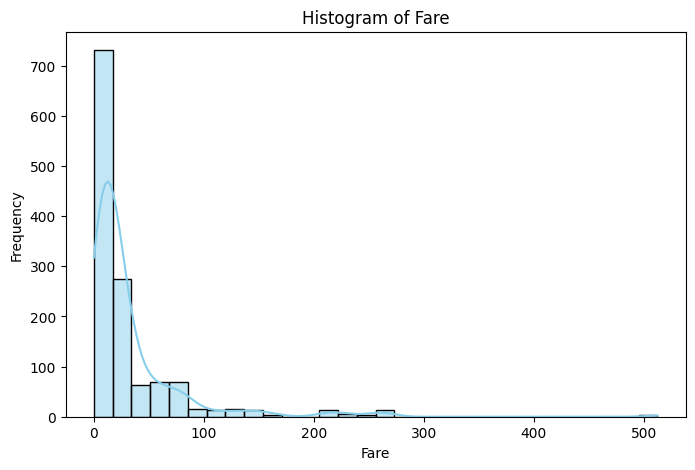

In [ ]:
selected_columns = ['Age', 'Fare']

for column in selected_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=dataset, x=column, bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
dataset.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived          0
dtype: int64

In [ ]:
duplicate_rows = dataset[dataset.duplicated()]
print('Jumlah data duplikat =', len(duplicate_rows))

Jumlah data duplikat = 0


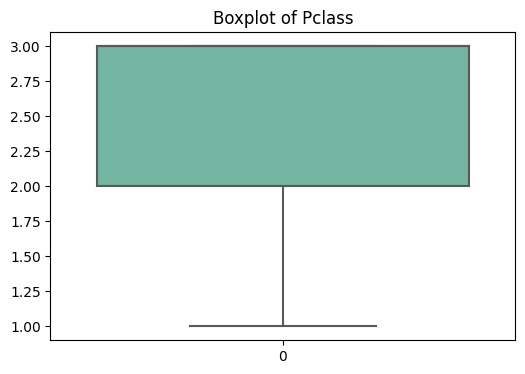

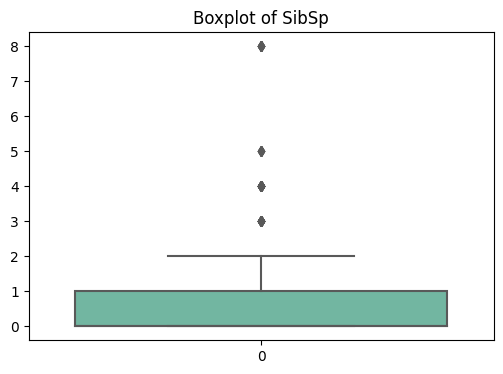

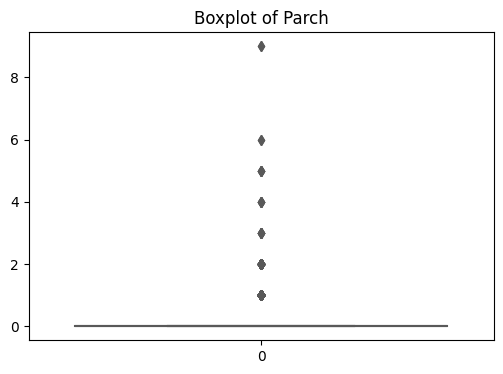

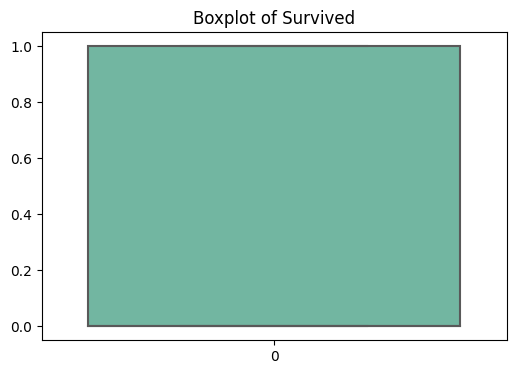

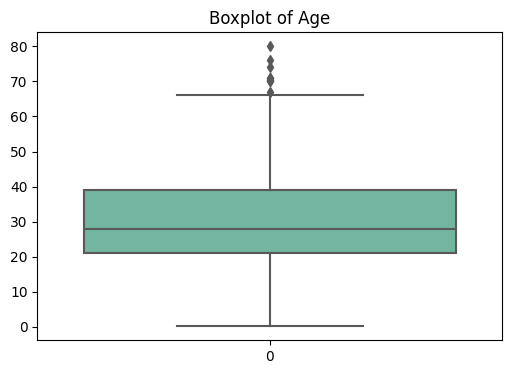

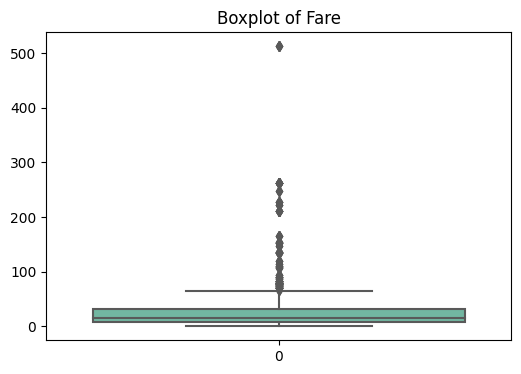

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Pclass','SibSp','Parch', 'Survived','Age', 'Fare']
data_to_plot = dataset[selected_columns]

for column in data_to_plot.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data_to_plot[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.show()


# Data Preparation

## Clean Data

### Handling nilai null

In [ ]:
# Impute Null Values
null_data_impute = ["Age","Fare"]

for column in null_data_impute:
  rata_rata = dataset[column].mean()
  dataset[column].fillna(rata_rata, inplace=True)

In [ ]:
# Removing Null Values
null_data_remove = ["Embarked"]

for column in null_data_remove:
  dataset.dropna(subset=column, inplace=True)

In [ ]:
dataset.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Survived          0
dtype: int64

## Selecting Data

In [ ]:
dropped_col = ["Ticket","Cabin"]
dataset = dataset.drop(columns=dropped_col)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Fare         1307 non-null   float64
 8   Embarked     1307 non-null   object 
 9   Survived     1307 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 112.3+ KB


## Rekayasa Fitur Data (Feature Engineering)

In [ ]:
# Membuat kolom baru FamilySize yang berisi mengenai jumlah keluarga
dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

# Membuat kolom baru IsAlone untuk menentukan apakah penumpang tersebut sendirian atau tidak
dataset['IsAlone'] = 1
dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

# Membuat kolom baru Title untuk mengetahui gelar dari penumpang
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
## Mengubah gelar yang memiliki jumlah sedikit
stat_min = 10
title_names = (dataset['Title'].value_counts() < stat_min)
dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

<ipython-input-18-78cb4d7927d9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0


In [ ]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,2,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,2,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,2,0,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,1,Mr


In [ ]:
new_order = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','IsAlone','Title','Survived']
dataset = dataset.reindex(columns=new_order)

In [ ]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,0


## Formatting Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

dataset['Sex'] = label.fit_transform(dataset['Sex'])
dataset['Embarked'] = label.fit_transform(dataset['Embarked'])
dataset['Title'] = label.fit_transform(dataset['Title'])


In [ ]:
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,3,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,4,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,2,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,4,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,3,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1307 non-null   int64  
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   int64  
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Fare         1307 non-null   float64
 8   Embarked     1307 non-null   int64  
 9   FamilySize   1307 non-null   int64  
 10  IsAlone      1307 non-null   int64  
 11  Title        1307 non-null   int64  
 12  Survived     1307 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 143.0+ KB


# Data Modelling

## Data Splitting

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Membagi variabel data menjadi variabel dependen dan independen
X = dataset.drop(['Survived', 'Name'], axis=1)
y = dataset['Survived']

# Merubah skala variabel bebas (variabel independen)
standardized_X = preprocessing.scale(X)

# Membagi data input menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(standardized_X, y,test_size=0.2, random_state=42)

# Menampilkan ukuran setiap subset
print(f"Jumlah Data Training  : {X_train.shape[0]}")
print(f"Jumlah Data Testing   : {X_test.shape[0]}")

Jumlah Data Training  : 1045
Jumlah Data Testing   : 262


## Algoritma Decission Tree

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Gini Index digunakan sebagai Splitting Criterion
modelDT_gini = DecisionTreeClassifier(criterion="gini",
random_state=100, max_depth=3, min_samples_leaf=5)
modelDT_gini.fit(X_train, y_train)
y_pred = modelDT_gini.predict(X_test)

# Mengevaluasi Model Decission Tree
print("=== Evaluasi performa Decission Tree ===")
print("Accuracy                 : ", accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix         :\n", confusion_matrix(y_test, y_pred))
print("Classification Report    : \n", classification_report(y_test, y_pred))

=== Evaluasi performa Decission Tree ===
Accuracy                 :  81.67938931297711
Confusion Matrix         :
 [[160   6]
 [ 42  54]]
Classification Report    : 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87       166
           1       0.90      0.56      0.69        96

    accuracy                           0.82       262
   macro avg       0.85      0.76      0.78       262
weighted avg       0.83      0.82      0.80       262



## Algoritma SVM

In [ ]:
from sklearn.svm import SVC

# Mentraining Model SVM
SVMmodel = SVC(C=1.0, kernel='rbf').fit(X_train, y_train)
y_pred = SVMmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

# Mengevaluasi Model SVM
print("=== Evaluasi performa SVM ===")
print("Accuracy               : ", accuracy_score(y_test, y_pred) * 100)
print("Confusion Matrix       :\n", confusion_matrix(y_test, y_pred))
print("Classification Report  :\n", classification_report(y_test, y_pred))

=== Evaluasi performa SVM ===
Accuracy               :  88.16793893129771
Confusion Matrix       :
 [[158   8]
 [ 23  73]]
Classification Report  :
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       166
           1       0.90      0.76      0.82        96

    accuracy                           0.88       262
   macro avg       0.89      0.86      0.87       262
weighted avg       0.88      0.88      0.88       262



# Visualisasi

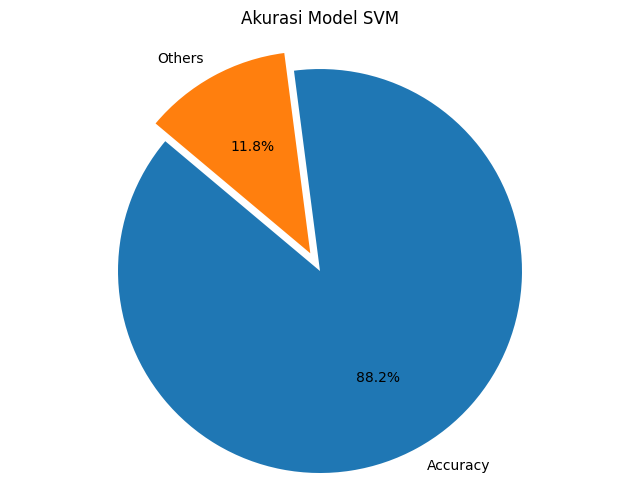

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Membuat Pie Chart untuk memvisualisasikan akurasi
labels = ['Accuracy', 'Others']
sizes = [accuracy, 100 - accuracy]
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Akurasi Model SVM')
plt.show()

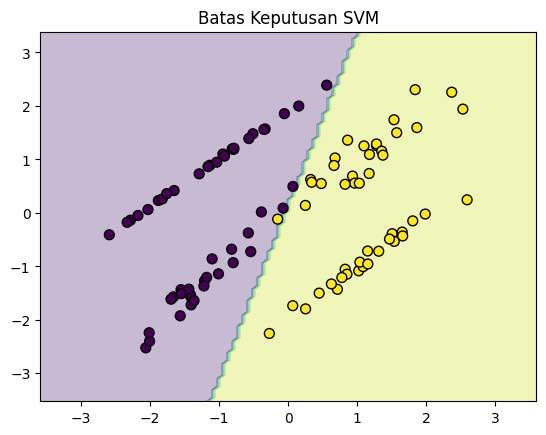

In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Membuat grid untuk plotting batas keputusan
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot batas keputusan
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Batas Keputusan SVM')
plt.show()